In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from datetime import timedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import pyplot
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print('{}: {}'.format(key,plt.rcParamsDefault[key]))
        
font_path = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'Impact', 'Western', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
legend.title_fontsize:

In [2]:
df = pd.read_csv('surface_dr_int_0306_09.csv',sep='\t',encoding='utf-8')
df.head()

MSR_DT  SHOP_CD  BOOTH_ID  ZONE_ID  ROBOT_ID  TORQUE01  \
0  2020-03-06 15:25:56.0  KV121PA         2        5        19         8   
1  2020-03-06 15:25:55.0  KV121PA         2        5        19         7   
2  2020-03-06 15:25:54.0  KV121PA         2        5        19         6   
3  2020-03-06 15:25:53.0  KV121PA         2        5        19        -3   
4  2020-03-06 15:25:52.0  KV121PA         2        5        19       -10   

   TORQUE02  TORQUE03  TORQUE04  TORQUE05  TORQUE06  TORQUE07  TORQUE08  \
0       -25        39         0        50        14         7         0   
1       -41        42         1        51        13        17         0   
2       -53        46         3        41       -16        45         0   
3       -39        56       -39       -53        -2       -26         0   
4       -24        73        58       -56        64       -35         0   

   TORQUE09  TORQUE10   JOB_NM  LINE_NO  STEP_NO  BRUSH_NO  \
0         0         0  PL1-YB5      391      251       NaN   
1         0         0  PL1-YB5      391      251       NaN   
2         0         0  PL1-YB5      391      251       NaN   
3         0         0  PL1-YB5      389      250       NaN   
4         0         0  PL1-YB5      382      249       NaN   

                 INST_DT  
0  2020-03-06 15:25:25.0  
1  2020-03-06 15:25:25.0  
2  2020-03-06 15:25:23.0  
3  2020-03-06 15:25:21.0  
4  2020-03-06 15:25:20.0

In [3]:
df.columns

Index(['MSR_DT', 'SHOP_CD', 'BOOTH_ID', 'ZONE_ID', 'ROBOT_ID', 'TORQUE01',
       'TORQUE02', 'TORQUE03', 'TORQUE04', 'TORQUE05', 'TORQUE06', 'TORQUE07',
       'TORQUE08', 'TORQUE09', 'TORQUE10', 'JOB_NM', 'LINE_NO', 'STEP_NO',
       'BRUSH_NO', 'INST_DT'],
      dtype='object')

In [4]:
df.columns = ['msr_dt','shop_cd','booth_id','zone_id','robot_id',
              'tq1','tq2','tq3','tq4','tq5','tq6','tq7','tq8','tq9','tq10',
              'job_nm','line_no','step_no','brush_no','inst_dt']

In [5]:
df.head()

msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-03-06 15:25:56.0  KV121PA         2        5        19    8  -25   39   
1  2020-03-06 15:25:55.0  KV121PA         2        5        19    7  -41   42   
2  2020-03-06 15:25:54.0  KV121PA         2        5        19    6  -53   46   
3  2020-03-06 15:25:53.0  KV121PA         2        5        19   -3  -39   56   
4  2020-03-06 15:25:52.0  KV121PA         2        5        19  -10  -24   73   

   tq4  tq5  tq6  tq7  tq8  tq9  tq10   job_nm  line_no  step_no  brush_no  \
0    0   50   14    7    0    0     0  PL1-YB5      391      251       NaN   
1    1   51   13   17    0    0     0  PL1-YB5      391      251       NaN   
2    3   41  -16   45    0    0     0  PL1-YB5      391      251       NaN   
3  -39  -53   -2  -26    0    0     0  PL1-YB5      389      250       NaN   
4   58  -56   64  -35    0    0     0  PL1-YB5      382      249       NaN   

                 inst_dt  
0  2020-03-06 15:25:25.0  
1  2020-03-06 15:25:25.0  
2  2020-03-06 15:25:23.0  
3  2020-03-06 15:25:21.0  
4  2020-03-06 15:25:20.0

In [6]:
df.shape

(50351, 20)

In [7]:
df['job_nm'].unique()

array(['PL1-YB5', 'PL1-CUV', 'INIT', 'HOME', 'MASTER'], dtype=object)

In [8]:
df_job = df[df['job_nm'] != 'INIT'].copy()
df_job = df_job[df_job['job_nm'] != 'HOME']
df_job = df_job[df_job['job_nm'] != 'MASTER']

In [9]:
print(df_job.shape)
df_job.head()

(49800, 20)


msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-03-06 15:25:56.0  KV121PA         2        5        19    8  -25   39   
1  2020-03-06 15:25:55.0  KV121PA         2        5        19    7  -41   42   
2  2020-03-06 15:25:54.0  KV121PA         2        5        19    6  -53   46   
3  2020-03-06 15:25:53.0  KV121PA         2        5        19   -3  -39   56   
4  2020-03-06 15:25:52.0  KV121PA         2        5        19  -10  -24   73   

   tq4  tq5  tq6  tq7  tq8  tq9  tq10   job_nm  line_no  step_no  brush_no  \
0    0   50   14    7    0    0     0  PL1-YB5      391      251       NaN   
1    1   51   13   17    0    0     0  PL1-YB5      391      251       NaN   
2    3   41  -16   45    0    0     0  PL1-YB5      391      251       NaN   
3  -39  -53   -2  -26    0    0     0  PL1-YB5      389      250       NaN   
4   58  -56   64  -35    0    0     0  PL1-YB5      382      249       NaN   

                 inst_dt  
0  2020-03-06 15:25:25.0  
1  2020-03-06 15:25:25.0  
2  2020-03-06 15:25:23.0  
3  2020-03-06 15:25:21.0  
4  2020-03-06 15:25:20.0

In [10]:
df_job['job_nm'].unique()

array(['PL1-YB5', 'PL1-CUV'], dtype=object)

In [11]:
df_yb = df_job[df_job['job_nm'] != 'PL1-CUV'].copy()
df_yb = df_yb.reset_index(drop=True)

df_cuv = df_job[df_job['job_nm'] != 'PL1-YB5'].copy()
df_cuv = df_cuv.reset_index(drop=True)

In [12]:
print(df_yb.shape)
df_yb.head()

(23217, 20)


msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-03-06 15:25:56.0  KV121PA         2        5        19    8  -25   39   
1  2020-03-06 15:25:55.0  KV121PA         2        5        19    7  -41   42   
2  2020-03-06 15:25:54.0  KV121PA         2        5        19    6  -53   46   
3  2020-03-06 15:25:53.0  KV121PA         2        5        19   -3  -39   56   
4  2020-03-06 15:25:52.0  KV121PA         2        5        19  -10  -24   73   

   tq4  tq5  tq6  tq7  tq8  tq9  tq10   job_nm  line_no  step_no  brush_no  \
0    0   50   14    7    0    0     0  PL1-YB5      391      251       NaN   
1    1   51   13   17    0    0     0  PL1-YB5      391      251       NaN   
2    3   41  -16   45    0    0     0  PL1-YB5      391      251       NaN   
3  -39  -53   -2  -26    0    0     0  PL1-YB5      389      250       NaN   
4   58  -56   64  -35    0    0     0  PL1-YB5      382      249       NaN   

                 inst_dt  
0  2020-03-06 15:25:25.0  
1  2020-03-06 15:25:25.0  
2  2020-03-06 15:25:23.0  
3  2020-03-06 15:25:21.0  
4  2020-03-06 15:25:20.0

In [13]:
df_yb.columns

Index(['msr_dt', 'shop_cd', 'booth_id', 'zone_id', 'robot_id', 'tq1', 'tq2',
       'tq3', 'tq4', 'tq5', 'tq6', 'tq7', 'tq8', 'tq9', 'tq10', 'job_nm',
       'line_no', 'step_no', 'brush_no', 'inst_dt'],
      dtype='object')

In [14]:
df_yb = df_yb[['msr_dt','tq1','tq2','tq3','tq4','tq5','tq6','tq7','step_no']]
df_cuv = df_cuv[['msr_dt','tq1','tq2','tq3','tq4','tq5','tq6','tq7','step_no']]

In [15]:
df_yb.head()

msr_dt  tq1  tq2  tq3  tq4  tq5  tq6  tq7  step_no
0  2020-03-06 15:25:56.0    8  -25   39    0   50   14    7      251
1  2020-03-06 15:25:55.0    7  -41   42    1   51   13   17      251
2  2020-03-06 15:25:54.0    6  -53   46    3   41  -16   45      251
3  2020-03-06 15:25:53.0   -3  -39   56  -39  -53   -2  -26      250
4  2020-03-06 15:25:52.0  -10  -24   73   58  -56   64  -35      249

In [16]:
df_yb.shape

(23217, 9)

In [17]:
# df_yb = df_yb.set_index('msr_dt')
# df_yb.index = pd.DatetimeIndex(df_yb.index)
# df_yb_minute = df_yb.resample('T').mean()
# df_yb_minute.shape

   * 동일한 로봇동작 step에서 토크값의 시간의 변화량을 모니터링
   * 1 ~ 111스탭별, 축별 시계열 토크값 변화량

In [18]:
df_yb['msr_dt'] = pd.to_datetime(df_yb['msr_dt'])
df_cuv['msr_dt'] = pd.to_datetime(df_cuv['msr_dt'])

In [19]:
df_yb['msr_dt'][0]

Timestamp('2020-03-06 15:25:56')

In [20]:
df_yb_hour = pd.date_range(df_yb['msr_dt'][0],df_yb['msr_dt'][len(df_yb)-1],freq='H')

In [21]:
len(df_yb_hour)

64

In [22]:
df_yb_hour[0]

Timestamp('2020-03-06 15:25:56', freq='H')

In [24]:
for i in range(1,len(df_yb_hour)):
    globals()['df_yb_{}'.format(i)] = pd.DataFrame()
    for j in range(len(df_yb)):
        if df_yb.iloc[j,0] >= df_yb_hour[i-1] and df_yb.iloc[j,0] < df_yb_hour[i]:
            a = pd.DataFrame([df_yb.iloc[j,:]],columns=df_yb.columns)
            globals()['df_yb_{}'.format(i)] = pd.concat([globals()['df_yb_{}'.format(i)],a])
    globals()['df_yb_{}'.format(i)] = globals()['df_yb_{}'.format(i)].reset_index(drop=True)
#     globals()['df_yb_{}'.format(i)].to_csv(r'df_yb_houly_data/['df_yb_{}'.format(i)].csv')

SyntaxError: invalid syntax (<ipython-input-24-114876ebdc7c>, line 8)

(10, 100)

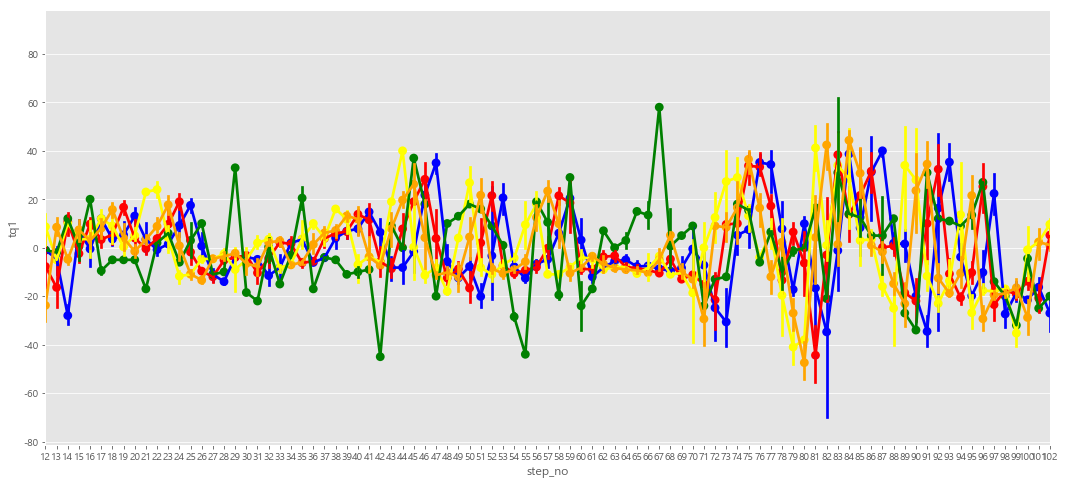

In [142]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(18,8)

sns.pointplot(data = df_yb_1, x = 'step_no', y = 'tq1', color='blue')
sns.pointplot(data = df_yb_2, x = 'step_no', y = 'tq1', color='red')
sns.pointplot(data = df_yb_3, x = 'step_no', y = 'tq1', color='yellow')
sns.pointplot(data = df_yb_5, x = 'step_no', y = 'tq1', color='green')
sns.pointplot(data = df_yb_6, x = 'step_no', y = 'tq1', color='orange')
ax.set_xlim(10,100)

In [143]:
from scipy.fftpack import fft

In [148]:
yf = fft(df_yb_1['tq1'])

In [178]:
yf.shape

(2101,)

In [183]:
a = round(yf.shape[0]/2)
a

1050

In [184]:
yf[0:a]

array([453.          +0.j        , -95.32888282 +40.13001916j,
        98.45481967-333.04962883j, ..., 644.27681282-109.32424672j,
       605.09813119-840.36936174j, 390.98445454 -94.80254324j])

In [189]:
xf = np.linspace(0.0,1.0/(2*yf.shape[0]))

In [191]:
xf

array([0.00000000e+00, 4.85677374e-06, 9.71354748e-06, 1.45703212e-05,
       1.94270950e-05, 2.42838687e-05, 2.91406425e-05, 3.39974162e-05,
       3.88541899e-05, 4.37109637e-05, 4.85677374e-05, 5.34245112e-05,
       5.82812849e-05, 6.31380587e-05, 6.79948324e-05, 7.28516061e-05,
       7.77083799e-05, 8.25651536e-05, 8.74219274e-05, 9.22787011e-05,
       9.71354748e-05, 1.01992249e-04, 1.06849022e-04, 1.11705796e-04,
       1.16562570e-04, 1.21419344e-04, 1.26276117e-04, 1.31132891e-04,
       1.35989665e-04, 1.40846439e-04, 1.45703212e-04, 1.50559986e-04,
       1.55416760e-04, 1.60273533e-04, 1.65130307e-04, 1.69987081e-04,
       1.74843855e-04, 1.79700628e-04, 1.84557402e-04, 1.89414176e-04,
       1.94270950e-04, 1.99127723e-04, 2.03984497e-04, 2.08841271e-04,
       2.13698045e-04, 2.18554818e-04, 2.23411592e-04, 2.28268366e-04,
       2.33125140e-04, 2.37981913e-04])

TypeError: type numpy.ndarray doesn't define __round__ method

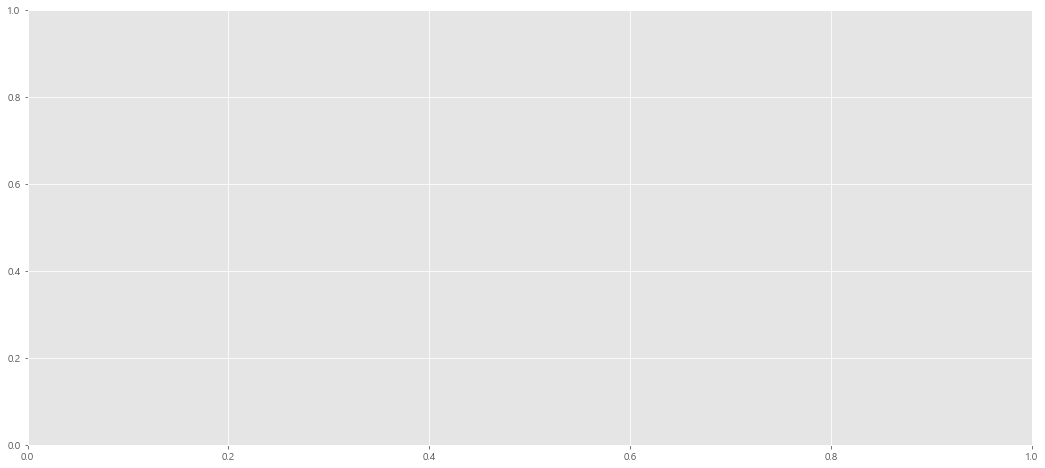

In [190]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(18,8)
plt.stem(xf,np.abs(yf[0:a])*2/yf.shape[0]))

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 7축 스텝별 토크값 그래프 ')]

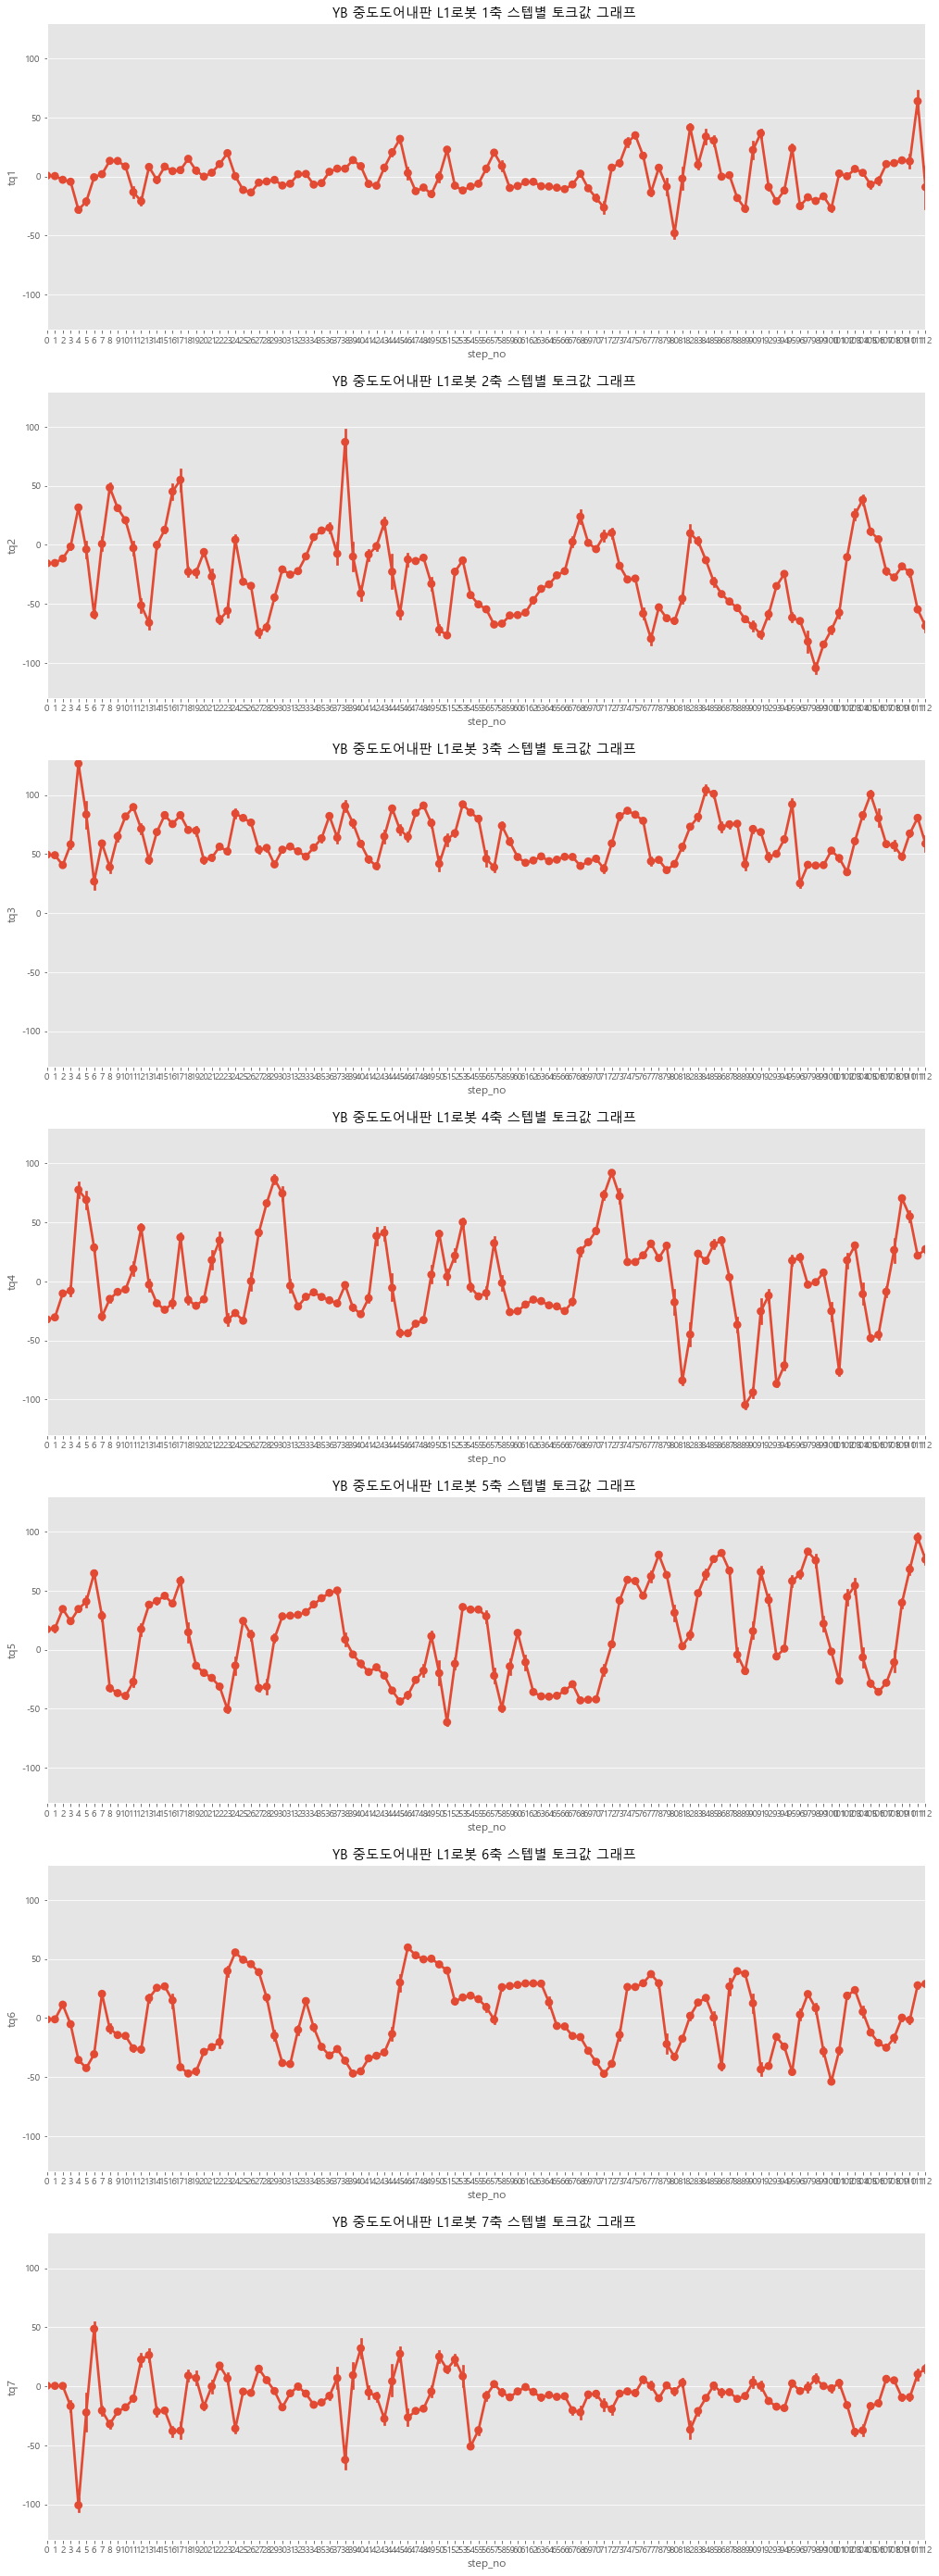

In [67]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,_)) = plt.subplots(4,2)
fig.set_size_inches(17,50)

sns.pointplot(data = df_yb, x='step_no', y='tq1',ax=ax1)
ax1.set_xlim(0,112)
ax1.set_ylim(-130,130)
ax1.set(title = 'YB 중도도어내판 L1로봇 1축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq2',ax=ax2)
ax2.set_xlim(0,112)
ax2.set_ylim(-130,130)
ax2.set(title = 'YB 중도도어내판 L1로봇 2축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq3',ax=ax3)
ax3.set_xlim(0,112)
ax3.set_ylim(-130,130)
ax3.set(title = 'YB 중도도어내판 L1로봇 3축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq4',ax=ax4)
ax4.set_xlim(0,112)
ax4.set_ylim(-130,130)
ax4.set(title = 'YB 중도도어내판 L1로봇 4축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq5',ax=ax5)
ax5.set_xlim(0,112)
ax5.set_ylim(-130,130)
ax5.set(title = 'YB 중도도어내판 L1로봇 5축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq6',ax=ax6)
ax6.set_xlim(0,112)
ax6.set_ylim(-130,130)
ax6.set(title = 'YB 중도도어내판 L1로봇 6축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq7',ax=ax7)
ax7.set_xlim(0,112)
ax7.set_ylim(-130,130)
ax7.set(title = 'YB 중도도어내판 L1로봇 7축 스텝별 토크값 그래프 ')

In [ ]:
# fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1)
# fig.set_size_inches(17,70)

# sns.pointplot(data = df_cuv, x='step_no', y='tq1', hue='msr_dt2',ax=ax1)
# ax1.set_xlim(0,112)
# ax1.set_ylim(-130,130)
# ax1.set(title = 'YB cuv 중도도어내판 L1로봇 1축 스텝별 토크값 그래프 ')

# sns.pointplot(data = df_cuv, x='step_no', y='tq2', hue='msr_dt2',ax=ax2)
# ax2.set_xlim(0,112)
# ax2.set_ylim(-130,130)
# ax2.set(title = 'YB cuv 중도도어내판 L1로봇 2축 스텝별 토크값 그래프 ')

# sns.pointplot(data = df_cuv, x='step_no', y='tq3', hue='msr_dt2',ax=ax3)
# ax3.set_xlim(0,112)
# ax3.set_ylim(-130,130)
# ax3.set(title = 'YB cuv 중도도어내판 L1로봇 3축 스텝별 토크값 그래프 ')

# sns.pointplot(data = df_cuv, x='step_no', y='tq4', hue='msr_dt2',ax=ax4)
# ax4.set_xlim(0,112)
# ax4.set_ylim(-130,130)
# ax4.set(title = 'YB cuv 중도도어내판 L1로봇 4축 스텝별 토크값 그래프 ')

# sns.pointplot(data = df_cuv, x='step_no', y='tq5', hue='msr_dt2',ax=ax5)
# ax5.set_xlim(0,112)
# ax5.set_ylim(-130,130)
# ax5.set(title = 'YB cuv 중도도어내판 L1로봇 5축 스텝별 토크값 그래프 ')

# sns.pointplot(data = df_cuv, x='step_no', y='tq6', hue='msr_dt2',ax=ax6)
# ax6.set_xlim(0,112)
# ax6.set_ylim(-130,130)
# ax6.set(title = 'YB cuv 중도도어내판 L1로봇 6축 스텝별 토크값 그래프 ')

# sns.pointplot(data = df_cuv, x='step_no', y='tq7', hue='msr_dt2',ax=ax7)
# ax6.set_xlim(0,112)
# ax6.set_ylim(-130,130)
# ax6.set(title = 'YB cuv 중도도어내판 L1로봇 7축 스텝별 토크값 그래프 ')

[Text(0.5, 1.0, 'YB 중도도어내판 L1로봇 각축별 토크값 시계열 그래프')]

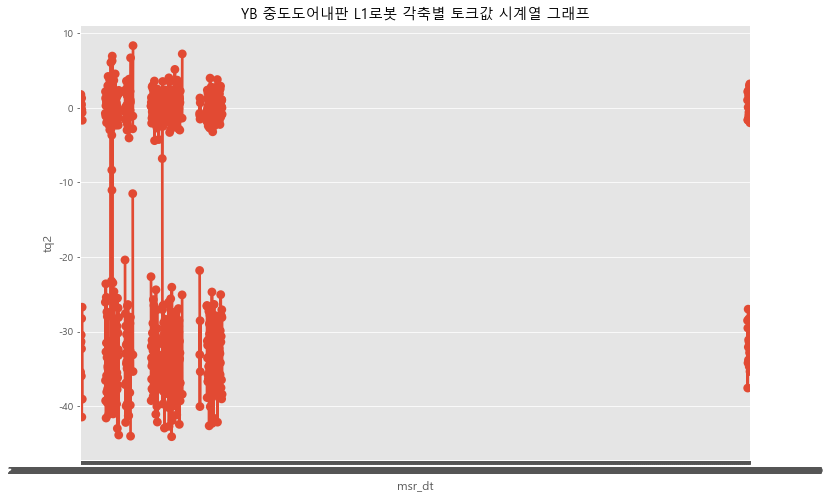

In [47]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,8)

sns.pointplot(data = df_yb_minute, x = df_yb_minute.index, y = 'tq1')
sns.pointplot(data = df_yb_minute, x = df_yb_minute.index, y = 'tq2')
# sns.lineplot(data = df_yb, x='msr_dt', y='tq2')
# sns.lineplot(data = df_yb, x='msr_dt', y='tq3')
# sns.lineplot(data = df_yb, x='msr_dt', y='tq4')
# sns.lineplot(data = df_yb, x='msr_dt', y='tq5')
# sns.lineplot(data = df_yb, x='msr_dt', y='tq6')
# sns.lineplot(data = df_yb, x='msr_dt', y='tq7')
ax.set(title = 'YB 중도도어내판 L1로봇 각축별 토크값 시계열 그래프')